## Introdução

<br>

Temos hoje no mercado um boom de aplicações envolvendo o uso de algoritmos de Machine Learning, sendo utilizados nos mais diversos setores da indústria, para realizarem uma série de tarefas como classificação, modelos de regressão, previsões, segmentações, etc. Isso no entanto, levou a uma percepção errônea sobre o papel desses algoritmos em projetos analíticos. Enquanto que a escolha do algoritmo seja fundamental, devendo estar de acordo com o problema que será atacado no projeto, os prazos de implementação e a infraestrutura disponível para a produção do modelo, o desempenho do algoritmo (por mais robusto que seja - ex. Deep Learning) é totalmente dependente da qualidade dos dados com que os algoritmos de treino são alimentados.

Os algoritmos de ML aprendem a realizar tarefas específicas após serem alimentados com exemplos que representam um cenário, um sistema específico, bem como o resultado que queremos prever naquele sistema (especialmente no contexto de aprendizagem supervisionada). Intuitivamente, podemos imaginar que, quanto melhor aquele cenário for representado, mais próximo da realidade, melhor será a compreesão do algoritmo sobre as relações entre as variáveis desse sistema, e assim, melhor será seu desempenho na tarefa desejada. 

Os cenários, no contexto de ciência de dados, são representados por conjuntos de dados que depois de preparados, assumem estruturas geralmente matriciais. De fato, praticamente todo algoritmo de ML implementado hoje através de frameworks processa os inputs em sua forma matricial, e realizam cálculos estatísticos (especialmente modelos paramétricos) em conjunto com aplicações de álgebra linear nesses dados para chegarem ao modelo final. 

Dentre as etapas de preparação de dados, um ponto de atenção sempre será a __dimensionalidade__ dos vetores que representam cada exemplo de um sistema. A dimensionalidade do conjunto de dados está geralmente relacionada a dois fatores: a riqueza de informações que puderam ser coletadas sobre o sistema, podendo assim representá-lo com mais variáveis, e além disso, o __domínio__ do conjunto de dados. 

Um bom exemplo de domínio de dados são emails, documentos ou artigos em aplicações de Processamento de Linguágem Natural. Esse cenário pode ser descrito em uma matriz chamada de __Bag of Words__:

A matriz $X$ representa um bag of words contendo $\normalsize m$ documentos $D$ sendo representados por $\normalsize n$ termos $T$ enquanto que $w$ representa a frequência do termo $T$ no documento $D$.
<br>
<img src="https://latex.codecogs.com/gif.latex?%5Clarge%20X%20%3D%20%5Cbegin%7Bbmatrix%7D%20%26%20T_1%20%26%20T_2%20%26%20%5Ccdots%20%26%20T_n%5C%5C%20D_1%20%26%20w_1_1%20%26%20w_1_2%20%26%20%5Ccdots%20%26%20w_1_n%5C%5C%20D_2%20%26%20w_2_1%20%26%20w_2_2%20%26%20%5Ccdots%20%26%20w_2_n%5C%5C%20%5Cvdots%20%26%20%5Cvdots%20%26%20%5Cvdots%20%26%20%5Cddots%20%26%20%5Cvdots%5C%5C%20D_m%20%26%20w_m_1%20%26%20w_m_2%20%26%20%5Ccdots%20%26%20w_m_n%20%5Cend%7Bbmatrix%7D">
<br>
Texto é um perfeito exemplo de domínio de dados que são representados por matrizes de __alta dimensionalidade__, uma vez que precisamos compor um __vocabulário__ de termos (únicos ou compostos) do conjunto de documentos disponíveis, para depois representar cada documento através da frequência desses termos. Isso gera inclusive o que chamamos de __vetores esparços__, onde a maioria dos valores são iguais à zero. Supondo que no exemplo acima, o vocabulário final contivesse um total de 50.000 termos (o que, acredite, poderia ser bem maior), significaria que cada documento seria representado como um vetor de 50.000 dimensões, $\normalsize R^{50.000}$. Isso representa um nível alto de complexidade que precisamos trabalhar, bem diferente de exemplos de datasets didáticos que vemos quando começamos a aprender sobre Data Science. 

A alta dimensionalidade tem implicações que merecem atençao quando estamos modelando dados. Uma delas, comumente referida na literatura como a _maldição da dimensionalidade_ (curse of dimensionality) é o problema da extração de medidas e padrões matemáticos em espaços vetoriais de alta dimensao. Um exemplo prático disso é o comportamento da distância euclidiana em diferentes espaços vetoriais. Ela é calculada através da fórmula abaixo:
<br>
<img src="https://latex.codecogs.com/gif.latex?%5Clarge%20d_a_b%20%3D%20%5Csqrt%7B%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%20%28x_a_i%20-%20x_b_i%29%5E%7B2%7D%7D">
<br>
Onde $a$ e $b$ são dois vetores de $R^{n}$, e $x$ representa os respectivos valores de $a$ e $b$

A distância euclidiana é utilizada como medida de distância padrão para a maioria dos algoritmos de clusterização disponíveis, como K-means, DBSCAN, e o próprio KNN (embora esse seja supervisionado, utilizando a distância entre vetores para classificar um novo vetor). Ela é computacionalmente eficiente e funciona muito bem para baixos espaços dimensionais. Porém, conforme aumentamos o número de dimensões, as distâncias entre os vetores começam a se perder, e com elas, a informação contida:

<img src="https://miro.medium.com/max/1760/1*J3nATcT6JqXybtYqoTiTdg.png" width='780px'>

Enquanto que redes neurais artificiais, especialmente as profundas (chamadas de __deep learning__) tem se mostrado algoritmos extremamente robustos para encontrar padrões e modelar dados em altos espaços dimensionais, o custo computacional e as dificuldades de implementação desses modelos os tornam inviáveis em uma série de aplicações e contextos. Já para os algoritmos tradicionais de ML, a dificuldade de modelar em alta dimensionalidade e o custo compotacional envolvendo computações em matrizes demasiadamente grandes continua se fazendo presente, especialmente em uma era de Big Data e da ingestão de quantidades massivas de dados - em sua grande maioria não estruturados - como texto. 

Felizmente, existem maneiras de se abordar esse problema. A álgebra linear nos proporciona maneiras de decompor matrizes de alta dimensionalidade, e representar os dados originais em espaços dimensionais menores retendo o máximo de informação possível. Nesse Notebook, vamos abordar 3 técnicas fundamentais em se tratando de redução de dimensionalidade e como elas estão intimamente relacionadas: __Eigendecomposition__ (EVD), __Singular Value Decomposition__ (SVD) e o __Principal Component Analysis__ (PCA). Vamos também mostrar cálculos exemplificando essas técnicas e como implementá-las em python. Por fim, vamos comparar com algoritmos já implementados de pacotes importantes em data science: o PCA do __Sklearn__ e o SVD do __Numpy__.

In [1]:
import warnings
import numpy as np
import pandas as pd
import scipy.linalg as la
import matplotlib.pyplot as plt
from visualizacoes import display_vec, display_matrix, plot_vecs

In [2]:
# Configura estilo de exibição dos gráficos
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
plt.style.use('ggplot')
np.set_printoptions(suppress=True)

In [3]:
df = pd.DataFrame

<br>

### Transformações Lineares
<br>
Transformações lineares são funções que associam dois espaços vetorias preservando operações de adição vetorial e multiplicação por escalar. Em outras palavras, são funções que transformam um vetor em outro de forma linear: $\normalsize f : v \rightarrow u $. 

Transformações lineares são basicamente o foco de estudo da álgebra linear, uma vez que essas transformações funcionam como mapas entre espaços vetoriais, que é exatamente o que estamos interessados em abordar nesse notebook: representar um espaço vetorial em outro de menor dimensionalidade. De fato, transformações lineares são fundamentais em ciência de dados, e estão ocorrendo por trás de praticamente todos os algoritmos já implementados que utilizamos em frameworks prontos. A ideia aqui é justamente mostrar essas transformações ocorrendo de forma a abrir a caixa preta de alguns dos algoritmos mais relevantes em análise exploratória e preparação de dados 

Uma transformação linear pode ser representada como uma multiplicação de matrizes: $\normalsize f(v) = Av $ onde $\normalsize A$ é uma matriz que representa a transformação linear, sendo multiplicada pelo vetor alvo $\normalsize v$.

Vamos ver um exemplo de transformação do vetor $\normalsize v$ por uma matriz $\normalsize A$.

Utilizaremos como exemplo vetores de duas dimensões e matrizes pequenas para facilitar a visualização gráfica e compreensão dos exemplos, mas assuma que as técnicas demonstradas são normalmente aplicadas a grandes matrizes e vetores.

Primeiro, vamos criar o vetor $\vec{v_1}$ e plotá-lo no plano cartesiado.

In [4]:
v_1 = np.array([2, 3])

In [5]:
display_vec(v_1)

<br>$\begin{bmatrix}2& 3\end{bmatrix}$<br><br>

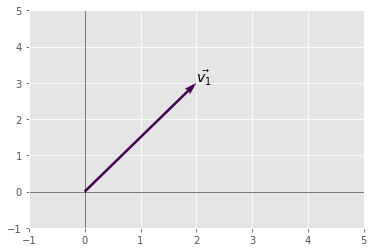

In [6]:
plot_vecs(v_1, labels="$\\vec{v_1}$")

Criamos agora uma matriz $\normalsize A$ que será a transformação linear de $\vec{v_1}$ como $\normalsize A\vec{v_1}$.
<br>
<br>
<br>
$$
\normalsize
A = \begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}
$$
<br>
Lembrando que a multiplicação entre uma matriz $m$ x $n$ por um vetor $m$ x 1 resultará em um novo vetor $m$ x 1. Generalizando a regra para multiplicações entre matrizes, a matriz resultante tem sempre o número de linhas da primeira matriz e o número de colunas da segunda matriz, ou seja, em algebra linear, a ordem dos produtos __altera__ o resultado! Isso é um dos fundamentos da álgebra linear. 

In [7]:
A = np.array([[4,3],
              [1,2]])

In [8]:
display_matrix(A)

<br>$\begin{bmatrix}4&3\\1&2\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)



Na célula abaixo, usamos o operador @ para realizar a multiplicação entre matrizes e vetores. Quando as matrizes e vetores são objetos array do numpy, podemos usar o método __dot()__ para realizar o __dot product__ pelo vetor ou matriz ao invés de usar o operador @.

In [9]:
Av_1 = A @ v_1

In [10]:
display_vec(Av_1)

<br>$\begin{bmatrix}17& 8\end{bmatrix}$<br><br>

Temos agora um vetor $A\vec{v_1}$ que é a transformação linear de $\vec{v_1}$. Vamos agora plotá-lo e ver como o novo vetor se compara com o vetor original

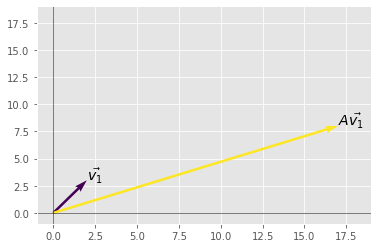

In [11]:
vecs = np.array([v_1, Av_1])
labels = ["$\\vec{v_1}$", "$A\\vec{v_1}$"]
plot_vecs(vecs, labels)

Repare que o vetor $\vec{v_1}$, quando multiplicada pela a matriz $A$, sofre uma transformação linear que muda sua direção, e sua magnetude.
<br>
<br>
(1)$$
\normalsize
A\vec{v_1} = \begin{bmatrix}4&3\\1&2\end{bmatrix} \begin{bmatrix}2\\3\end{bmatrix}
$$
<br>
<br>
(2)$$
\normalsize
A\vec{v_1} = \begin{bmatrix}(4*2) + (3*3)\\(1*2) + (2*3)\end{bmatrix}
$$
<br>
<br>
(3)$$
\normalsize
A\vec{v_1} = \begin{bmatrix}8 + 9\\2 + 6\end{bmatrix}
$$
<br>
(4)$$
\normalsize
A\vec{v_1} = \begin{bmatrix}17\\8\end{bmatrix}
$$
<br>
<br>
Vamos agora ver a transformação linear de um segundo vetor $\vec{v_2} = \begin{bmatrix}3\\1\end{bmatrix}$. 
Abaixo plotamos ele no plano cartesiano

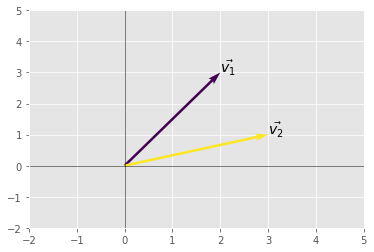

In [12]:
v_2 = np.array([3,1])
vecs = np.array([v_1, v_2])
labels = ["$\\vec{v_1}$", "$\\vec{v_2}$"]
plot_vecs(vecs, labels)

<br>
E agora, vamos aplicar a transformação $A\vec{v_2}$
<br>

In [13]:
Av_2 = A @ v_2

Acima a seguinte transformação foi efetuada:
<br>
<br>
(1)$$
\normalsize
A\vec{v_2} = \begin{bmatrix}4&3\\1&2\end{bmatrix} . \begin{bmatrix}3\\1\end{bmatrix}
$$
<br>
(2)$$
\normalsize
A\vec{v_2} = \begin{bmatrix}15\\5\end{bmatrix}
$$

Novamente, vamos plotar no plano cartesiano e ver como o vetor foi transformado

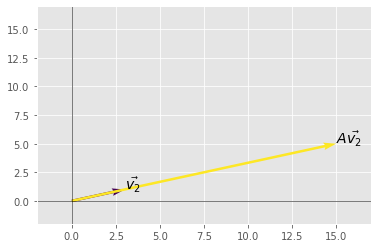

In [14]:
vecs = np.array([v_2, Av_2])
labels = ["$\\vec{v_2}$", "$A\\vec{v_2}$"]
plot_vecs(vecs, labels)

<br>
<br>
Pela plotagem acima, percebemos que a transformação linear do vetor $\vec{v_2}$ pela matriz $A$ alterou sua magnetude, mas __não alterou sua direção__. Aplicar a transformação com $A$ no vetor $\vec{v_2}$ foi equivalente à multiplicá-lo pelo escalar 5:
<br>
<br>
$$
\normalsize
\begin{bmatrix}4&3\\1&2\end{bmatrix} . \begin{bmatrix}3\\1\end{bmatrix} = 5  \begin{bmatrix}3\\1\end{bmatrix}
$$

Isso nos diz que $\vec{v_2}$ é um __autovetor__ da transformação linear de $A$, e que 5 é o __autovalor__ associado a esse autovetor. 

### Autovalores e Autovetores

De maneira simplificada, _autovetores_ de uma transformação linear são os vetores dos quais uma transformação linear aplicada a ele é equivalente a multiplicá-lo por um escalar chamado de autovalor. Essa transformação não gera uma mudança de __direção__ no vetor, apenas uma possível mudança de magnetude do vetor, magnetude essa que está associada justamente ao _autovalor_.

<img src="https://www.mathsisfun.com/algebra/images/eigen-transform.svg" width="500px">

Eles são chamados na literatura estrangeira de _eigenvectors_ e _eigenvalues_ (_eigen_ é um termo alemão que significa "auto", "próprio"). A equação que explica a relação de autovetores e autovalores, como já vimos no exemplo acima, é dada por:

$$ \Large Ax = \lambda x $$

Onde: 
-  $\normalsize A $ é uma matriz que representa a transformação linear aplicada
-  $\normalsize x$ representa o autovetor
-  $\normalsize\lambda$ representa o autovalor
 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Eigenvalue_equation.svg/375px-Eigenvalue_equation.svg.png" width='300px'>

Vamos agora representar como encontramos autovalores e seus respectivos autovetores:

Vamos usar o exemplo acima, e mostrar como chegamos a $\lambda = 5$ e $\vec{v_2} = \begin{bmatrix}3\\1\end{bmatrix}$ a partir da matriz $A$

Seja:

$$
\normalsize
A = \begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}
$$

Encontraremos primeiro os autovalores, depois os autovetores associados a esses autovalores.

Fazemos uma pequena transformação na equação para encontrar os autovalores:

(1)$$ \normalsize Ax = \lambda x $$

(2)$$\normalsize Ax - \lambda x = \vec{0} $$

(3)$$\normalsize (A - \lambda)x = \vec{0} $$

(4)$$\normalsize (A - \lambda I)x = \vec{0} $$

Repare que multiplicamos $\lambda$ por uma _matriz de identidade_ $I$ de mesma ordem que a matriz $A$ uma vez que não podemos efetuar uma operação de subtração entre uma matriz $A$ e um escalar $\lambda$. 

Uma matriz identidade $I$ de 2x2 é:

$$\normalsize I = \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}$$

Feito esse ajuste, podemos encontrar os autovalores da matriz através da __equação característica__, ou __polinômio característico__, igualando a determinante da matriz resultante da subtração à zero:

$$\normalsize \det(A - \lambda I) = 0 $$

Primeiro, vamos ver como é a matriz resultante de $\normalsize(A-\lambda I)$:

(1)$$\normalsize\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}-\lambda \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}$$

(2)$$\normalsize\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}-\begin{bmatrix}\lambda & 0\\ 0 & \lambda\end{bmatrix}$$

(3)$$\normalsize\begin{bmatrix}(4 - \lambda) & 3\\ 1 & (2 - \lambda)\end{bmatrix}$$

Agora calculamos a equação característica, igualando a determinante dessa matriz a zero. Isso nos leva à um polinômio de ordem igual a ordem da matriz, no nosso caso, uma polinômio de ordem 2:

(1)$$\normalsize(4 - \lambda)(2 - \lambda) - (3.1) = 0$$

(2)$$\normalsize\lambda^{2} - 6\lambda + 5 = 0$$

(3)$$\normalsize \lambda = 5 \,, \, \lambda = 1$$

Agora que encontramos os autovalores, podemos substituí-los na equação e encontrar seus respectivos autovetores através de um __sistema homogêneo__:

Para $\normalsize \lambda = 1$:

$$\normalsize\begin{bmatrix}(4 - 1) & 3\\ 1 & (2 - 1)\end{bmatrix}.\begin{bmatrix}v_1\\ v_2\end{bmatrix}=\begin{bmatrix}0\\ 0
\end{bmatrix}$$

A representação do sistema:

$$\normalsize\begin{cases} 3v_1 + 3v_2 = 0&\\ v_1 + v_2 = 0& \end{cases}$$

Resolvendo o sistema, descobrimos que:

$$ \normalsize v_1 = - v_2$$

Uma característica de sistemas lineares onde temos o mesmo número de equações e incognitas, é que o sistema possui um grau de liberdade maior do que zero, em outras palavras, permite em sua solução, variáveis lívres. No nosso caso, $\normalsize v_2$ é uma variável lívre, e o autovetor para $\normalsize \lambda = 1$ pode ser escrito como:

$$\normalsize\vec{V_1} = \begin{bmatrix}-v_2\\ v_2\end{bmatrix} = v_2\begin{bmatrix}-1\\ 1\end{bmatrix}$$

Fazendo o mesmo cálculo para $\normalsize \lambda = 5$:

$$\normalsize\vec{V_2} = \begin{bmatrix} 3v_2\\ v_2 \end{bmatrix} = v_2 \begin{bmatrix} 3\\ 1 \end{bmatrix}$$

Finalizando, a decomposição dessa matriz com eigendecomposition nos retorna :

$$\normalsize \lambda = \begin{bmatrix} 5\\ 1 \end{bmatrix}, \vec{V} = \begin{bmatrix} 3\\ 1 \end{bmatrix} , \begin{bmatrix}-1\\ 1 \end{bmatrix}$$

Podemos agora utilizar a mesma equação $A\vec{v} = \lambda\vec{v}$ que utilizamos para encontrar os autovelores e autovetores, agora para testar se eles são realmente autovalores e vetores. Basta substituir o autovalor e respectivo autovetor na equação e verificar se existe de fato a igualdade. 

Para $\normalsize \lambda = 5, \vec{v} = \begin{bmatrix} 3\\ 1 \end{bmatrix}$:

(1)$$\normalsize\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix} \begin{bmatrix} 3\\ 1 \end{bmatrix}=5 \begin{bmatrix} 3\\ 1 \end{bmatrix}$$

(2)$$\normalsize\begin{bmatrix} 15 \\ 5 \end{bmatrix}=\begin{bmatrix} 15\\ 5 \end{bmatrix}$$

Para $\normalsize \lambda = 1, \vec{v} = \begin{bmatrix} -1\\ 1 \end{bmatrix}$:

(1)$$\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix} \begin{bmatrix} -1\\ 1 \end{bmatrix}=1 \begin{bmatrix} -1\\ 1 \end{bmatrix}$$

(2)$$\begin{bmatrix} -1 \\ 1 \end{bmatrix}=\begin{bmatrix} -1\\ 1 \end{bmatrix}$$

Vamos agora ver como extraímos autovalores e autovetores no python. Se, fazendo a conta na mão, precisamos passar por algumas etapas como vimos no exemplo acima, no python, precisamos de apenas uma linha de código! O módulo __linalg__ do pacote Numpy novamente vem para nos salvar de fazer esses cálculos massantes manualmente. A função __linalg.eig__ extraí os autovalores e autovetores de uma matriz passada e retorna dois objetos: um array contendo os autovalores e uma matriz contendo os autovetores como colunas da matriz.

Vamos aplicar a função na matriz $A$ e ver os resultados

In [15]:
eigvals, eigvecs = np.linalg.eig(A)

Vamos exibir agora os autovalores e autovetores encontrados com a função eig:

In [16]:
display_vec(eigvals)

<br>$\begin{bmatrix}5& 1\end{bmatrix}$<br><br>

Podemos ver que a função encontrou os mesmos autovalores que calculamos na mão. Show! Vamos agora ver os autovetores

In [17]:
display_matrix(eigvecs)

<br>$\begin{bmatrix}0.95&-0.71\\0.32&0.71\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)



Aqui percebemos que a função trouxe autovetores (ordenados por colunas) com valores diferentes dos que encontramos durante o exemplo!

Erramos no cálculo? __Não!__

Se você voltar no cálculo, veja que encontramos os vetores $\vec{V_1} = \begin{bmatrix}-v_2\\ v_2\end{bmatrix}$ e $\vec{V_2} = \begin{bmatrix} 3v_2\\ v_2 \end{bmatrix}$

A única coisa, é que para simplificar as contas e facilitar a compreensão do exemplo, assumimos a variável livre $v_2 = 1$. Dessa forma, obtivemos os vetores [3,1] e [-1,1].

O algoritmo do numpy que utilizamos encontrou os mesmos vetores, porém ele os retorna com seu comprimento igual a 1. Vetores de comprimento 1 são chamados de __vetores unitários__. Em outras palavras, ele retorna os vetores com a variável livre assumindo o valor necessário para o comprimento (ou magnetude) do vetor ser igual a 1. 

Ok, e como encontramos o valor da variável $v_2$ que satisfaz $\left |v  \right | = 1$? 

No nosso caso, basta aplicar o bom e velho teorema de pitágoras igualando a hipotenusa a 1:

<img src="https://mathbitsnotebook.com/Geometry/Transformations/vectorgraph.jpg">

Temos então que para o vetor $\vec{V_1} = \begin{bmatrix}-v_2\\ v_2\end{bmatrix}$:

(1)$$ \normalsize \left | v_1 \right | = \sqrt{(-v_2)^{2} + v_2^{2}} = 1$$ 
<br>
(2)$$ \normalsize \sqrt{2v_2^{2}} = 1$$
<br>
(3) Elevando ambos os lados ao quadrado temos 
$$ \normalsize 2v_2^{2} = 1$$
<br>
(4) Finalmente
$$ \normalsize v_2 = \frac{1}{\sqrt{2}} \approx 0.71$$
<br>
<br>
Substituindo o valor de $v_2 = 0.71$ no vetor temos que $ \vec{v_1} = \begin{bmatrix}-0.71\\ 0.71\end{bmatrix}$

Fazendo o mesmo cálculo para o vetor $\vec{v_2} = \begin{bmatrix} 3v_2\\ v_2 \end{bmatrix}$
<br>
(1)$$ \normalsize \left | v_2 \right | = \sqrt{(3v_2)^{2} + v_2^{2}} = 1$$ 
<br>
(2)$$ \normalsize \sqrt{10v_2^{2}} = 1$$
<br>
(3) 
$$ \normalsize v_2 = \frac{1}{\sqrt{10}} \approx 0.32$$
<br>
<br>
Substituindo o valor de $v_2 = 0.32$ no vetor temos que $ \vec{v_2} = \begin{bmatrix}0.95\\ 0.32\end{bmatrix}$

Vamos agora plotar os autovetores unitários com seus respectivos autovalores

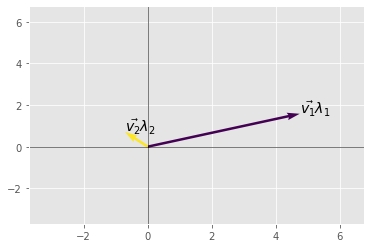

In [18]:
vecs = np.array([eigvecs.T[0]*eigvals[0], eigvecs.T[1]*eigvals[1]])
labels = ['$\\vec{v_1} \lambda_1$', '$\\vec{v_2} \lambda_2$']
plot_vecs(vecs, labels)

## Eigendecomposition (EVD)
<br>
Eigendecomposition é uma técnica que consiste em decompor uma matriz através de seus os <strong>autovalores</strong> e seus respectivos <strong>autovetores</strong>.
<br>
Seja $A$ uma matriz quadrada, que contem n autovalores $\lambda_1$, $\lambda_2$ ... $\lambda_n$ e $V$ uma matriz contendo os n respectivos autovetores $v_1$, $v_2$ ... $v_n$ de $A$, sabemos que:

$$\normalsize AV = VD$$
<br>
Onde 
$$
D = \begin{bmatrix}\lambda_1&0&\cdots&0\\0&\lambda_2&\cdots&0\\\vdots&\vdots&\ddots&\vdots\\0&0&\cdots&\lambda_n \end{bmatrix}
$$
<br>
Portanto
<br>
$$\normalsize AV = [\,\lambda_1 v_1\,\,\lambda_2 v_2\,\cdots\,\lambda_n v_n\,]$$

Sendo assim, podemos decompor a matriz $A$ seguindo a seguinte equação:

$$\normalsize A = VDV^{-1}$$

Vamos novamente usar o exemplo da matriz $\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}$ e testar se a equação acima funciona:

In [19]:
V = eigvecs

In [20]:
D = np.diag(eigvals)

In [21]:
V_inv = np.linalg.inv(V)

In [22]:
print('Matriz V:')
display_matrix(V)
print('Matriz D:')
display_matrix(D)
print('Matriz V inversa:')
display_matrix(V_inv)

Matriz V:


<br>$\begin{bmatrix}0.95&-0.71\\0.32&0.71\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)

Matriz D:


<br>$\begin{bmatrix}5&0\\0&1\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)

Matriz V inversa:


<br>$\begin{bmatrix}0.79&0.79\\-0.35&1.06\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)



Aplica-se a equação acima:

In [23]:
A = V @ D @ V_inv
display_matrix(A)

<br>$\begin{bmatrix}4&3\\1&2\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)



Agora que demos uma boa introdução sobre transformações lineares, autovalores e autovetores, podemos finalmente pular para os algoritmos que queremos explorar nesse notebook: Singular Value Decomposition e Principal Component Analysis. Mas, ao invés de usar matrizes simples que criamos para demonstrar alguns conceitos, iremos importar um dataset completo chamado 'customers.csv', que contem informações reais e descaracterizadas de consumo de algumas categorias de alimentos de uma rede de supermercados de Portugal por cliente. Com um dataset mais robusto podemos explorar melhor esses algoritmos e seu funcionamento.

A ideia aqui é explicar como essas técnicas funcionam, como elas podem se relacionar. Enquanto isso, implementaremos nosso próprio algoritmo utilizando apenas funções do numpy que já exploramos. E por fim, vamos comparar os resultados com as versões já implementadas desses algoritmos, para ver se estamos no caminho certo!

Vamos então importar e __preparar__ os dados.

In [24]:
dataset = pd.read_csv("customers.csv")
dataset.drop(['Regiao', 'Canal'], axis = 1, inplace = True)
dataset.head()

,Frescos,Laticinios,Doces,Congelados,Limpeza,Padaria
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


O dataset contem 6 variáveis como podemos ver. Essencialmente, dataframes do Pandas são excelentes estruturas de dados para se trabalhar em python. Eles suportam operações de álgebra linear uma vez que o pacote Pandas foi criado encima do Numpy, e também operações típicas de bancos de dados relacionais (um dataframe é análogo a uma tabela no SQL Server por exemplo), ou seja, resumindo, dataframes são matrizes, com todo o suporte da álgebra linear por trás, e que também suportam operações de seleção, indexação e manipulação de dados, lindo!

Porém todavia entretanto, o objetivo deste notebook didático é explorar técnicas fatoração de matrizes e a matemática por trás delas. Vamos então usar apenas as 'propriedades matriciais' assim dizendo do dataframe. Como disse que o Pandas foi literalmente construído encima do Numpy, transformar o dataframe em uma matriz pura de numpy é a coisa mais simples do mundo.

Criaremos então a matriz $X$ usando o atributo _values_ do dataframe. (Se você não compreende muito bem o que vem a ser um atributo do dataframe, sugiro a leitura a respeito de _programação orientada a objetos_ - spoiler alert: Python é uma linguagem multiparadigma, que suporta, entre outras, a __programação orientada a objetos__ e __programação funcional__, sendo a segunda extremamente utilizada em scripts e pipelines de data science).

Voltando ao ponto, criamos a matriz

In [25]:
X = dataset.values

Vamos exibir as 5 primeiras linhas

In [26]:
display_matrix(X, n_rows=10)

<br>$\begin{bmatrix}12669&9656&7561&214&2674&1338\\7057&9810&9568&1762&3293&1776\\6353&8808&7684&2405&3516&7844\\13265&1196&4221&6404&507&1788\\22615&5410&7198&3915&1777&5185\\9413&8259&5126&666&1795&1451\\12126&3199&6975&480&3140&545\\7579&4956&9426&1669&3321&2566\\5963&3648&6192&425&1716&750\\6006&11093&18881&1159&7425&2098\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 6)



Agora que carregamos os dados e geramos a matriz, vamos realizar um pre-processamento nos dados.

Tanto o PCA quanto o SVD (assim como a maioria dos algoritmos de Machine Learning na realidade) são bastante sensíveis a variáveis em escalas diferentes, grandezas diferentes, que podem acabar distorcendo os cálculos. Uma variável de grandeza muito maior que as outras por exemplo, se não for normalizada pode acabar tendo um peso desproporcional em relação as outras, enviesando a análise.

Além disso, esses pré-processamentos simplificam a notação e a computação dos cálculos (algo bastante interessante para o objetivo desse notebook).

Primeiro, vamos avaliar a distribuição dos dados. Isso é importante para vermos se nossos dados são enviesados ou não. 

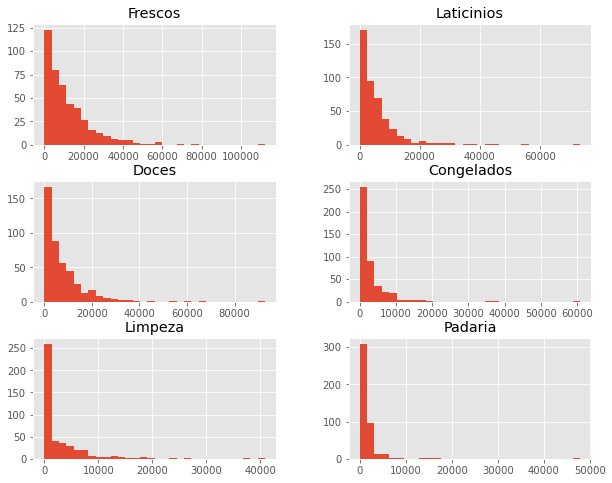

In [27]:
graph = dataset.hist(figsize=(10,8), bins=30)

Através da visualização acima, percebemos que os dados seguem uma distribuição enviesada (__skewed distribution__). Como mencionamos acima, algoritmos como o PCA são extremamente sensíveis a diferenças de escala, outliers e enviesamentos. Tanto para minimizar o enviesamento, quanto para facilitar a visualização, vamos aplicar uma __transformação logaritmica__ na matriz.

Fazemos isso extraíndo de cada elemento (portanto essa é uma operação _element-wise_) o seu logaritmo natural:

$$\Large x_{log} = log_ex$$

As vezes podemos encontrar a notação do logaritmo natural como $\normalsize \ln x$

Novamente, o numpy possui uma função bastante direta para realizar essa tarefa:

In [28]:
X = np.log(X)

In [29]:
display_matrix(X, n_rows=10)

<br>$\begin{bmatrix}9.45&9.18&8.93&5.37&7.89&7.20\\8.86&9.19&9.17&7.47&8.10&7.48\\8.76&9.08&8.95&7.79&8.17&8.97\\9.49&7.09&8.35&8.76&6.23&7.49\\10.03&8.60&8.88&8.27&7.48&8.55\\9.15&9.02&8.54&6.50&7.49&7.28\\9.40&8.07&8.85&6.17&8.05&6.30\\8.93&8.51&9.15&7.42&8.11&7.85\\8.69&8.20&8.73&6.05&7.45&6.62\\8.70&9.31&9.85&7.06&8.91&7.65\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 6)



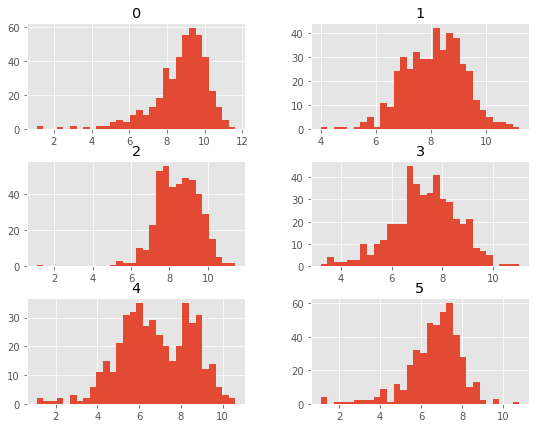

In [30]:
graph = df(X).hist(figsize=(9,7), bins=30)

Após a transformação logaritmica, os dados foram redistribuidos seguindo uma distribuição próxima a __normal__.

É preciso normalizar a matriz para garantir que a decomposição do SVD e a decomposição do PCA aplicado com o SVD sejam equivalentes:

- Subtrair dos dados a média de cada variável. 
- Dividir os dados pelo desvio padrão de cada variável.

Após a normalização, a média de todas as colunas passa a ser 0, e o desvio padrão, 1

Podemos resumir tudo o que foi explicado nos parágrafos acima em uma única equação:
<br>
<br>
<br>
$$\Large x_{norm} = \frac{x_{ij} - \mu_j}{\sigma_j} $$

Onde
- $\mu_i$ é a média aritmética da coluna $j$
- $\sigma_j$ é o desvio padrão da coluna $j$

Para cada valor $x$ da matriz $X$, vamos subtrair a média da variável e depois dividir pelo desvio padrão da variável para centralizar os valores, computando-os de acordo com sua distância para o centro. 

Novamente, o numpy torna essa tarefa extremamente conveniênte e simples, isso porque matrizes e arrays numpy possuem métodos que retornam suas estatísticas descritivas.

In [31]:
vetor_media = X.mean(axis=0)
display_vec(vetor_media)

<br>$\begin{bmatrix}8.73& 8.12& 8.44& 7.30& 6.79& 6.67\end{bmatrix}$<br><br>

In [32]:
vetor_std = X.std(axis=0)
display_vec(vetor_std)

<br>$\begin{bmatrix}1.48& 1.08& 1.11& 1.28& 1.72& 1.31\end{bmatrix}$<br><br>

Aplicando a normalização

In [33]:
X = (X - vetor_media) / vetor_std

Matriz normalizada

In [34]:
display_matrix(X, 10)

<br>$\begin{bmatrix}0.48&0.98&0.44&-1.51&0.64&0.41\\0.09&0.99&0.65&0.13&0.76&0.62\\0.02&0.89&0.45&0.38&0.80&1.76\\0.52&-0.96&-0.08&1.14&-0.32&0.63\\0.88&0.44&0.40&0.76&0.41&1.44\\0.28&0.83&0.09&-0.62&0.41&0.47\\0.45&-0.05&0.37&-0.88&0.74&-0.28\\0.14&0.36&0.64&0.09&0.77&0.91\\-0.03&0.07&0.26&-0.97&0.39&-0.03\\-0.02&1.10&1.26&-0.19&1.24&0.75\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 6)



A normalização, como mencionado, transforma todas as médias em 0, e desvio padrão em 1.

In [35]:
display_vec(X.mean(axis=0))

<br>$\begin{bmatrix}0& 0& 0& 0& 0& 0\end{bmatrix}$<br><br>

In [36]:
display_vec(X.std(axis=0))

<br>$\begin{bmatrix}1& 1& 1& 1& 1& 1\end{bmatrix}$<br><br>

Matriz de dispersão entre as variáveis após toda essa preparação dos dados

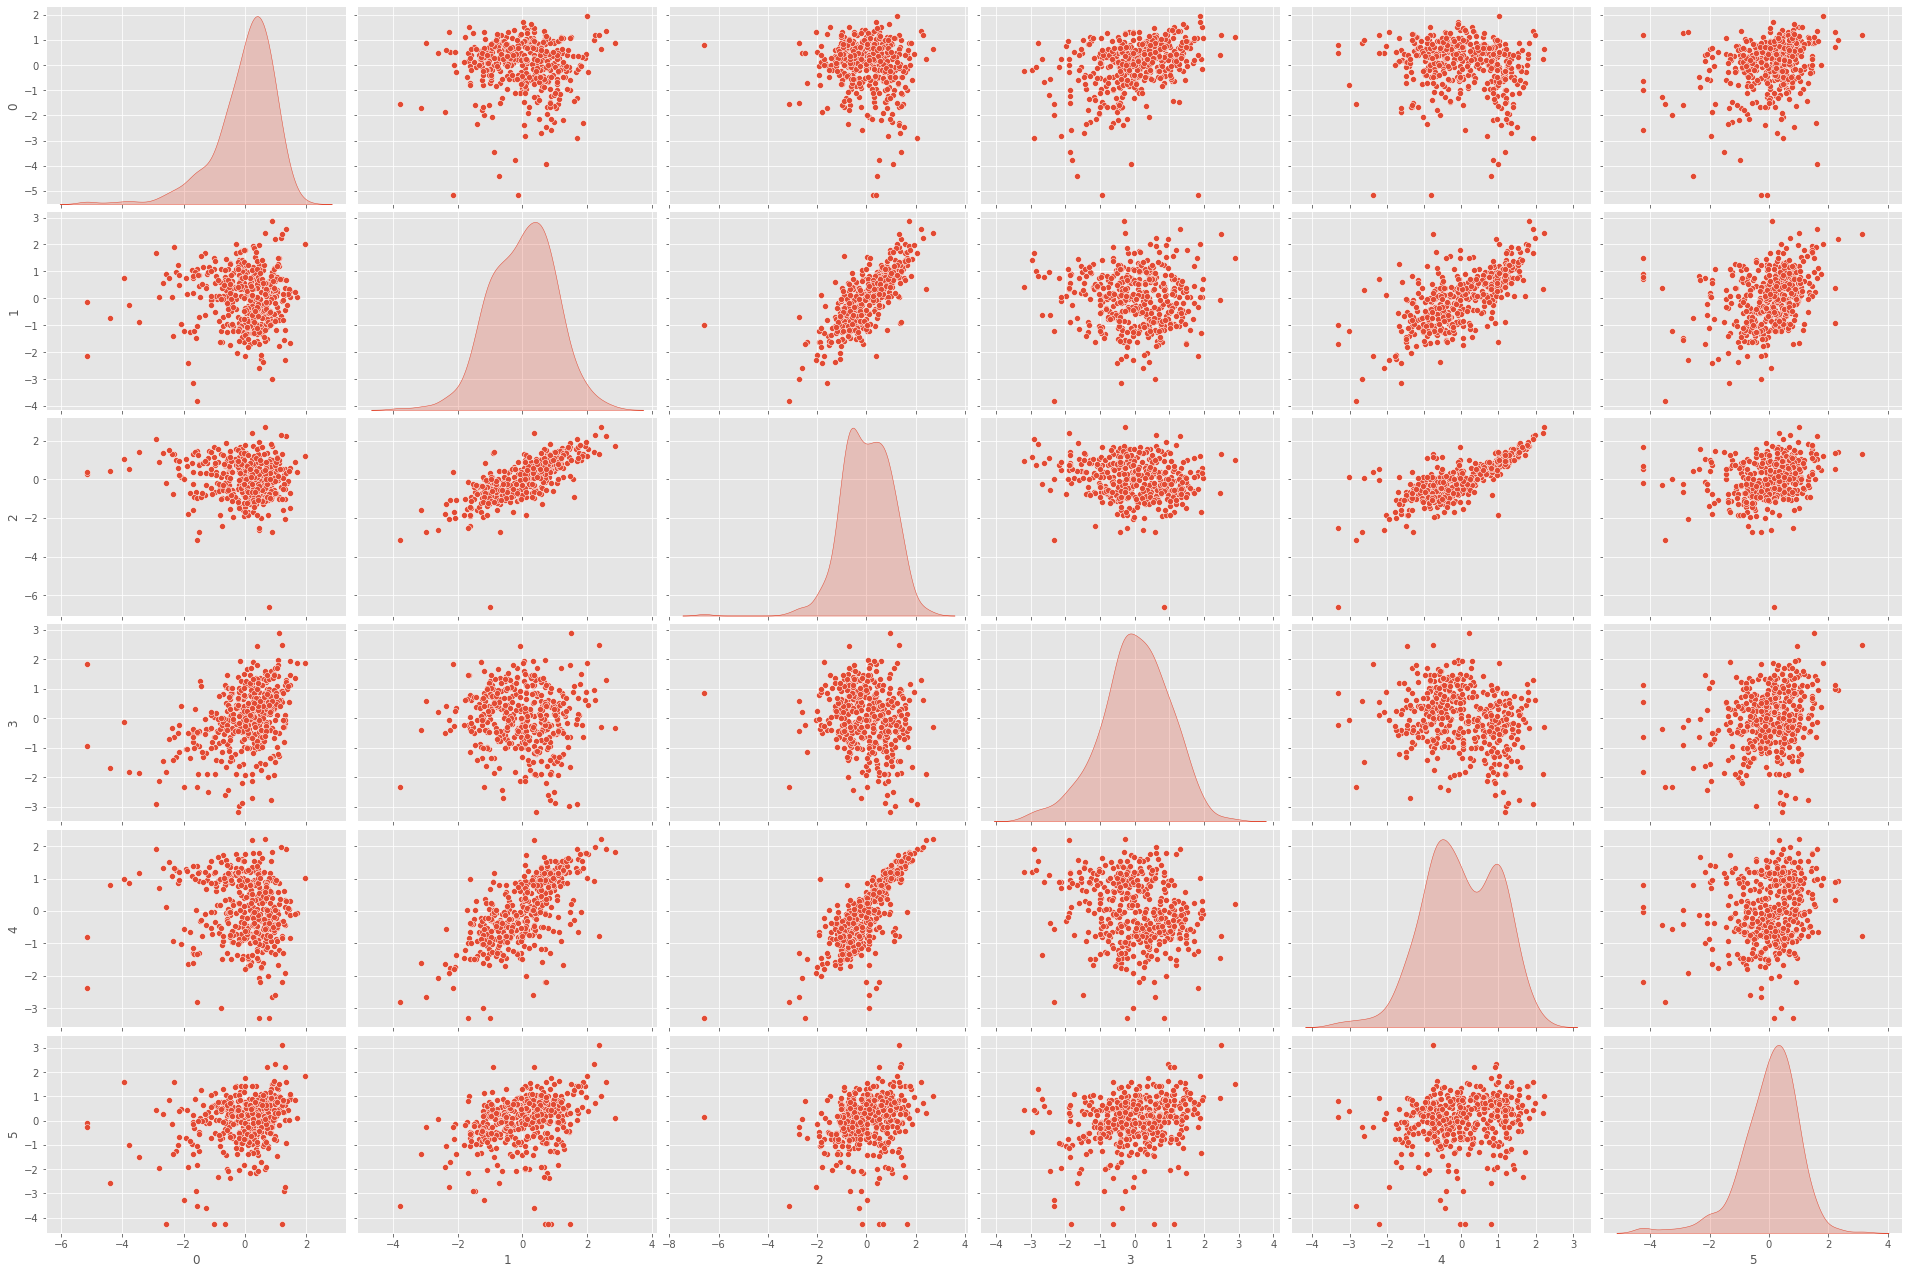

In [37]:
import seaborn as sns
g = sns.pairplot(df(X), diag_kind='kde', size=3, aspect=1.5)

Redistribuímos os dados em uma distribuição normal. Em essencia, essa matriz de comporta de maneira muito parecida com a __matriz de covariância__. 

A covariância, assim como a correlação, são maneiras de quantificar a intensidade da relação linear entre variáveis. E ela é de suma importância para aplicarmos o PCA! 

Como ela funciona?

<img src='https://media.geeksforgeeks.org/wp-content/uploads/Covar.png' width='500px'>

Por exemplo, podemos ver que existe uma grande covariância entre a variável 1 e a variável 2:

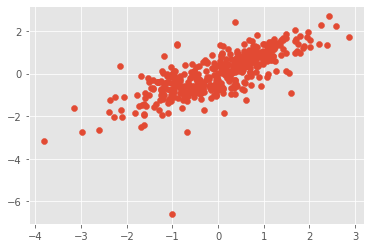

In [38]:
graph = plt.scatter(x=X[:,1], y=X[:,2])

## Singular Value Decomposition (SVD)

A próxima técnica de decomposição que vamos ver é chamada __Singular Value Decomposition__, ou __SVD__. Essa técnica, consiste em decompor uma matriz - quadrada ou não - em três outras matrizes resultantes e encontrar os __valores singulares__ da matriz. Se você leu o notebook até aqui, então entender como essa técnica sw fatoração de matrizes funciona será simples. Isso porque a decomposição é feita justamente através de autovalores e autovetores

$$
\Large
A = USV^{T} 
$$

Onde:
- $A$ é a matriz alvo $m_xn$ 
- $U$ é uma matriz $m_xm$ contendo os autovetores da matriz quadrada $AA^{T}$
- $V$ é uma matriz $n_xn$ contendo os autovetores da matriz quadrada $A^{T}A$
- $S$ é uma matriz diagonal $m_xn$ contendo os valores singulares da matriz, os mesmos para ambos 

Os valores singulares que temos na matriz $S$ são __raízes dos autovalores__ das matrizes $A^{T}A$ e $AA^{T}$, que possuem autovalores iguais.

Exemplo de aplicação de SVD:

Queremos decompor a matriz a seguir:

$$\normalsize A = \begin{bmatrix}3 & 2 & 2\\ 2 & 3 & -2\\\end{bmatrix}$$

In [39]:
A = np.array([[3,2,2], [2,3,-2]])
display_matrix(A)

<br>$\begin{bmatrix}3&2&2\\2&3&-2\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 3)



Começamos encontrando os autovalores da matriz $A^{T}A$ e os seus respectivos autovetores, chamados de __vetores direitos__ (right eigenvectors). Que são aqueles ordenados na transposta na matriz $V$.

In [40]:
A_TA = A.T @ A

In [41]:
display_matrix(A_TA)

<br>$\begin{bmatrix}13&12&2\\12&13&-2\\2&-2&8\end{bmatrix}$<br><br>

Dimensões da matriz: (3 x 3)



Extraímos então os autovalores dessa matriz utilizando o que já vimos acima, encontrando o polinômio característico dessa matriz dado por $\det(A^{T}A - \lambda I)$

Encontramos assim os autovalores $25, 9, 0$. 

Lembra que a matriz $S$ é uma matriz diagonal contendo os valores singulares da matriz, que são a raiz dos autovalores encontrados ordenados de forma decrescente? Portanto, a matriz $S$ é a seguinte:

(1)$$\normalsize S = \begin{bmatrix} \sqrt{25} & 0 & 0\\ 0 & \sqrt{9} & 0 \\ 0 & 0 & 0\end{bmatrix}$$

(2)$$\normalsize S = \begin{bmatrix} 5 & 0 & 0\\ 0 & 3 & 0\end{bmatrix}$$

Com os autovalores encontrados, podemos encontrar então os autovetores direitos de $A$ (com comprimento igual a 1 - vetor unitário):
<br>
<br>
<br>
$$\normalsize v_1 = \begin{bmatrix} 0.71\\0.71 \\ 0\end{bmatrix},\,\, v_2 = \begin{bmatrix} 0.24\\-0.24 \\ 0.94\end{bmatrix},\,\, v_3 = \begin{bmatrix} 0.67\\-0.67 \\ -0.33\end{bmatrix}$$

Encontramos assim mais uma matriz:

$$\normalsize V^{T} = \begin{bmatrix} 0.71 & 0.71 & 0\\ 0.24 & -0.24 & 0.94 \\ 0.67 & -0.67 & -0.33\end{bmatrix}$$

Podemos realizar esse procedimento usando a própria função __eig__!

Vamos também criar uma função útil que reordena os autovalores e autovetores de maneira decrescente

In [42]:
def orderDesc(vals, vecs):
    '''
    Essa função ordena os autovalores de maneira decrescente 
    Após isso, realinha os autovetores com os autovalores
    retorna ambos
    '''
    vecs = vecs[:, vals.argsort()[::-1]]
    vals = np.sort(vals)[::-1]
    return vals, vecs

In [43]:
vals, vects = np.linalg.eig(A_TA)
vals, vects = orderDesc(vals, vects)
display_matrix(vects.T)

<br>$\begin{bmatrix}-0.71&-0.71&0\\0.24&-0.24&0.94\\-0.67&0.67&0.33\end{bmatrix}$<br><br>

Dimensões da matriz: (3 x 3)



Repare que os sinais estão invertidos. Isso não é um problema na maioria dos casos. Autovetores tem natureza ambígua e podem ser retornados com sinais invertidos. Não é incomum diferentes implementações de algoritmos que computam autovetores retornarem valores iguais porém com sinais invertidos. Isso é tópico inclusive de muitas discussões em foruns como o stackoverflow como <a href='https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative'>aqui</a> e <a href='https://stackoverflow.com/questions/18152052/matlab-eig-returns-inverted-signs-sometimes'>aqui</a>. Cada algoritmo lida de uma maneira com essa ambiguidade. Veremos em mais detalhe isso a frente

Agora, para computar os vetores esquerdos, os que armazenamos em $U$, poderiamos seguir o procedimento padrão e encontrar os vetores. Porém, como já possuímos os vetores direitos e os autovalores, podemos "cortar caminho" para encontrar $U$ usando a fórmula abaixo:

(1)$$\normalsize \sigma_i u_i = A v_i$$

(2)$$\normalsize  u_i = \frac{1}{\sigma_i} A v_i$$

Onde $\sigma_i = \sqrt{\lambda_i}$

$U$ é portanto a seguinte matriz:

(1)$$\normalsize U = \begin{bmatrix}\frac{1}{\sigma_1}Av_1 & \frac{1}{\sigma_2}Av_2\end{bmatrix}$$

Utilizando essa formula, encontramos:

$$\normalsize U = \begin{bmatrix}0.71 & 0.71\\ 0.71 & -0.71\end{bmatrix}$$

Vamos reproduzir essa equação em python:

In [44]:
V = vects.T
S = np.sqrt(vals)
U = np.array([(A @ vec)/val for val, vec in zip(S, V)])[:2].T
display_matrix(U)

<br>$\begin{bmatrix}-0.71&0.71\\-0.71&-0.71\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)



In [45]:
display_matrix(np.diag(S)[:2])

<br>$\begin{bmatrix}5&0&0\\0&3&0\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 3)



Reconstrução da matriz através da sua decomposição: $A = USV^T$

In [46]:
A = U @ np.diag(S)[:2] @ V
display_matrix(A)

<br>$\begin{bmatrix}3&2&2\\2&3&-2\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 3)



Visualmente, podemos interpretar o SVD de uma matriz como:

<img src="https://www.researchgate.net/profile/Jila_Ayubi/publication/271076899/figure/fig1/AS:614261244051470@1523462701842/Singular-value-decomposition-of-A-a-full-rank-r-b-rank-k-approximation.png" width='500px'>

O SVD portanto se utiliza de técnicas que já demonstramos aqui. Vamos tentar aplicar o SVD a matriz $X$ e reconstruí-la utilizando a equação acima. O Numpy se encarrega novamente de nos fornecer uma função que realiza essa decomposição, o __numpy.linalg.svd__.

Aqui vai uma curiosidade: o pacote <a href='https://docs.scipy.org/doc/numpy/reference/routines.linalg.html#module-numpy.linalg'>linalg</a> do numpy (que significa <em>linar algebra</em>) utiliza rotinas do <a href='http://www.netlib.org/lapack/'>LAPACK</a> para resolver sistemas lineares em muitas de suas funções (inclusive __eig__ e __svd__). o LAPACK (Linear Algebra Package) consiste em rotinas de implementação de baixo nível escritas em Fortran 90 de algoritmos que resolvem problemas de álgebra linear, como é o caso da eigendecomposition.

Abaixo aplicamos a função do numpy na matriz do exemplo acima, que retorna matrizes $U, S, V^{T}$.

In [47]:
U,S,V = np.linalg.svd(A, full_matrices=True)

In [48]:
display_matrix(np.diag(S))

<br>$\begin{bmatrix}5&0\\0&3\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)



In [49]:
display_matrix(U)

<br>$\begin{bmatrix}0.71&-0.71\\0.71&0.71\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)



In [50]:
display_matrix(V)

<br>$\begin{bmatrix}0.71&0.71&0\\-0.24&0.24&-0.94\\-0.67&0.67&0.33\end{bmatrix}$<br><br>

Dimensões da matriz: (3 x 3)



Voltando para o dataset $X$ que estamos testando, vamos aplicar a decomposição em valores singulares com a função `svd` do numpy.

In [51]:
U, S, V = np.linalg.svd(X)

In [52]:
display_matrix(U, n_rows=5, n_cols=4)

<br>$\begin{bmatrix}0.04&-0.01&-0.01&0.09\\0.04&0.02&0.01&-0.00\\0.04&0.05&0.06&0.01\\-0.02&0.05&0.01&-0.02\\0.02&0.07&0.02&0.01\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 440)



In [53]:
display_matrix(np.diag(S))

<br>$\begin{bmatrix}34.08&0&0&0&0&0\\0&26.76&0&0&0&0\\0&0&16.85&0&0&0\\0&0&0&16.37&0&0\\0&0&0&0&11.38&0\\0&0&0&0&0&9.01\end{bmatrix}$<br><br>

Dimensões da matriz: (6 x 6)



In [54]:
display_matrix(V)

<br>$\begin{bmatrix}-0.10&0.54&0.57&-0.14&0.55&0.21\\0.59&0.13&-0.01&0.59&-0.07&0.53\\-0.63&-0.08&-0.13&-0.03&-0.20&0.73\\0.49&-0.06&-0.10&-0.79&-0.08&0.34\\-0.04&0.76&-0.10&-0.07&-0.62&-0.14\\-0.03&0.31&-0.80&0.01&0.51&0.00\end{bmatrix}$<br><br>

Dimensões da matriz: (6 x 6)



Agora, podemos reconstruir a matriz original usando a mesma fórmula de decomposição:

In [55]:
display_matrix(U @ la.diagsvd(S, *X.shape) @ V, n_rows=10)

<br>$\begin{bmatrix}0.48&0.98&0.44&-1.51&0.64&0.41\\0.09&0.99&0.65&0.13&0.76&0.62\\0.02&0.89&0.45&0.38&0.80&1.76\\0.52&-0.96&-0.08&1.14&-0.32&0.63\\0.88&0.44&0.40&0.76&0.41&1.44\\0.28&0.83&0.09&-0.62&0.41&0.47\\0.45&-0.05&0.37&-0.88&0.74&-0.28\\0.14&0.36&0.64&0.09&0.77&0.91\\-0.03&0.07&0.26&-0.97&0.39&-0.03\\-0.02&1.10&1.26&-0.19&1.24&0.75\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 6)



Comparando com a matrix $X$ original:

In [56]:
display_matrix(X, 10)

<br>$\begin{bmatrix}0.48&0.98&0.44&-1.51&0.64&0.41\\0.09&0.99&0.65&0.13&0.76&0.62\\0.02&0.89&0.45&0.38&0.80&1.76\\0.52&-0.96&-0.08&1.14&-0.32&0.63\\0.88&0.44&0.40&0.76&0.41&1.44\\0.28&0.83&0.09&-0.62&0.41&0.47\\0.45&-0.05&0.37&-0.88&0.74&-0.28\\0.14&0.36&0.64&0.09&0.77&0.91\\-0.03&0.07&0.26&-0.97&0.39&-0.03\\-0.02&1.10&1.26&-0.19&1.24&0.75\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 6)



## Principal Component Analysis (PCA)

A Análise de Componente Principal (PCA - <em>Principal Component Analysis</em>) é um algoritmo de redução de dimensionalidade vastamente utilizado no mercado e na academia em projetos de Data Science e análises estatísticas em geral. A premissa desse algoritmo é encontrar vetores chamados de componentes principais ortogonais, que explicam a maior parte da informação (leia-se __variância__) contida nos dados. Esses componentes principais são então usados como base para se projetar os dados originais em espaços dimensionais menores. Essa aplicação é especialmente útil para reduzir o custo computacional de outros algoritmos (especialmente no campo de Machine Learning) e também para facilitar a visualização de padrões e tendências nos dados em atividades de data discovery e análise exploratória. 

<img src="https://hackernoon.com/hn-images/1*WRKdN-NYF0mMumhfOXVa2Q.png" width='550px'>

Os componentes principais são vetores que se comportam como regressões, onde o modelo é ajustado dados de maneira a reduzir o erro quadrático entre a previsão e o valor real. A redução do erro quadrático é relacionado com a variância dos dados. Quanto menor o erro, maior a variância explicada, ou informação contida nos dados originais.

<img src="https://community.asdlib.org/imageandvideoexchangeforum/files/2013/07/Figure5.10.jpg" width='400px'>


O algoritmo do PCA encontra os componentes principais realizando a __eigendecomposition__ da matriz de covariância das variáveis do dataset original. O resultado dessa decomposição são os __autovetores__ e __autovalores__ (também chamados de <em>eigenvectors</em> e <em>eigenvalues</em>) da matriz de covariância, representando a direção e intensidade (ou nesse caso, energia/variância explicada) dos componentes principais

<img src="https://www.neuraldesigner.com/images/principal_components_data_x_y_PCA1_PCA2.png" width='500px'>

Uma vez extraídos os autovetores e autovalores, eles são ordenados em ordem decrescente, do primeiro principal componente (o que possui o maior __autovalor__) para o menor. Os dados originais são então projetados em um espaço dimensional reduzido (onde cada dimensão é um componente principal). A quantidade de dimensões / componentes principais utilizados para a projeção dos dados é um parâmetro do algoritmo. O ideal é encontrar o tradeoff ótimo entre o máximo de variância explicada e a menor quantidade de componentes principais necessários para representar essa variância.

### Implementação do PCA com EVD

Agora que exemplificamos o que são e como são computados os eigenvalues e eigenvectors (componentes principais no PCA), vamos ver como eles são utilizados dentro do algoritmo.

Antes de tudo, é importante __normalizar__ os dados para a aplicação do PCA, uma vez que esse algoritmo é extremamente sensível a variáveis de grandezas diferentes, o que compromete diretamente a decomposição. Podemos aplicar o cálculo do __z-score__ para transformar os valores originais de acordo o distanciamento deles em relação a média da variável, distância essa medida em __desvios padrão__:

$$\normalsize x_z = \frac{x - \mu_x }{\sigma }$$

Dada uma matrix de features $\normalsize X$, de dimensões $\normalsize m_xn$, é computada a matriz de covariância $\normalsize n_xn$ de $\normalsize X$. 

A covariância entre duas variáveis $x$ e $y$ é expressa como:

$$\normalsize cov(x,y) = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

Entretanto, aqui vai o primeiro efeito de centralizarmos e normalizarmos a matriz $X$. Lembra que todas as médias das variáveis são iguais a 0? A covariância entre duas variáveis no nosso caso é computada como:

$$\normalsize cov(x,y) = \frac{1}{n-1} \sum_{i=1}^{n}x_i y_i$$

Dessa forma, podemos usar a equação abaixo para calcular a __matriz de correlação de Pearson__, que, quando os dados estão normalizados com z-score, é equivalente a matriz de covariância. De fato, todo esse tópico que envolve a aplicação de PCA com dados centralizados ou não centralizados, com correlação ou com covariância, são bastante discutidos (deixo aqui um exemplo de uma discussão interessante no <a href='https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance?rq=1'>stackoverflow</a> sobre as diferentes abordagens). Seguiremos __uma__ abordagem apenas, mas de forma a criar uma base para que as demais abordagens possam ser compreendidas mais facilmente após a leitura deste notebook. 

$$\normalsize C = \frac{1}{(n - 1)}X^TX$$

É realizada então a eigendecomposition dessa matriz $\normalsize C$ de forma que:

$$\normalsize CV = VD$$

$$\normalsize C = VDV^{-1}$$

Onde:
- $V$ é a matriz de autovetores de $C$
- $C$ é a matriz de covariância
- $V^{-1}$ é a matriz inversa de $V$
- $D$ é a matriz diagonal de autovalores

Agora, a matriz de autovalores é reordenada de maneira decrescente, onde o primeiro valor de $\normalsize \lambda$

Selecionamos então os $k$ componentes principais que queremos utilizar para projetar os dados originais.

$$\normalsize W = V_k$$ 

Onde $W$ possui dimensões $n_xk$

Finalmente, para projetar os dados originais na base dos $k$ componentes principais, temos:

$$\normalsize X' = XW$$


In [57]:
display_matrix(X, 10)

<br>$\begin{bmatrix}0.48&0.98&0.44&-1.51&0.64&0.41\\0.09&0.99&0.65&0.13&0.76&0.62\\0.02&0.89&0.45&0.38&0.80&1.76\\0.52&-0.96&-0.08&1.14&-0.32&0.63\\0.88&0.44&0.40&0.76&0.41&1.44\\0.28&0.83&0.09&-0.62&0.41&0.47\\0.45&-0.05&0.37&-0.88&0.74&-0.28\\0.14&0.36&0.64&0.09&0.77&0.91\\-0.03&0.07&0.26&-0.97&0.39&-0.03\\-0.02&1.10&1.26&-0.19&1.24&0.75\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 6)



O primeiro passo para implementar o PCA como visto acima é computar a matriz de covariância de $X$. Aqui a matriz é calculada através da fórmula exibida na explicação acima:

In [58]:
C = (X.T @ X) * 1/(len(X) - 1)

In [59]:
display_matrix(C)

<br>$\begin{bmatrix}1.00&-0.02&-0.13&0.38&-0.16&0.26\\-0.02&1.00&0.76&-0.06&0.68&0.34\\-0.13&0.76&1.00&-0.16&0.80&0.24\\0.38&-0.06&-0.16&1.00&-0.21&0.26\\-0.16&0.68&0.80&-0.21&1.00&0.17\\0.26&0.34&0.24&0.26&0.17&1.00\end{bmatrix}$<br><br>

Dimensões da matriz: (6 x 6)



A matriz foi computada através da equação para facilitar a visualização da implementação do PCA. O ideal nesse caso no entanto, seria usar a função `cov` do pacote Numpy passando como argumento, a __transposta de X__, ou então, passando o argumento `rowvar` como __Falso__, pois essa função por padrão espera que as linhas da matriz de input sejam as variáveis e as colunas, as observações, no entanto estamos trabalhando com as variáveis nas colunas:

In [60]:
display_matrix(np.cov(X, rowvar=False))

<br>$\begin{bmatrix}1.00&-0.02&-0.13&0.38&-0.16&0.26\\-0.02&1.00&0.76&-0.06&0.68&0.34\\-0.13&0.76&1.00&-0.16&0.80&0.24\\0.38&-0.06&-0.16&1.00&-0.21&0.26\\-0.16&0.68&0.80&-0.21&1.00&0.17\\0.26&0.34&0.24&0.26&0.17&1.00\end{bmatrix}$<br><br>

Dimensões da matriz: (6 x 6)



In [61]:
display_matrix(pd.DataFrame(X).corr())

<br>$\begin{bmatrix}1&-0.02&-0.13&0.38&-0.16&0.26\\-0.02&1&0.76&-0.06&0.68&0.34\\-0.13&0.76&1&-0.16&0.80&0.24\\0.38&-0.06&-0.16&1&-0.21&0.25\\-0.16&0.68&0.80&-0.21&1&0.17\\0.26&0.34&0.24&0.25&0.17&1\end{bmatrix}$<br><br>

Dimensões da matriz: (6 x 6)



O próximo passo é fazer a eigendecomposition da matriz de covariância, retornando a matriz de autovalores e respectivos autovetores

In [62]:
D, V = np.linalg.eig(C)

In [63]:
display_vec(D)

<br>$\begin{bmatrix}2.65& 1.63& 0.65& 0.61& 0.18& 0.30\end{bmatrix}$<br><br>

In [64]:
display_matrix(V)

<br>$\begin{bmatrix}-0.10&0.59&0.63&0.49&-0.03&-0.04\\0.54&0.13&0.08&-0.06&0.31&0.76\\0.57&-0.01&0.13&-0.10&-0.80&-0.10\\-0.14&0.59&0.03&-0.79&0.01&-0.07\\0.55&-0.07&0.20&-0.08&0.51&-0.62\\0.21&0.53&-0.73&0.34&0.00&-0.14\end{bmatrix}$<br><br>

Dimensões da matriz: (6 x 6)



Como visto antes, precisamos reordenar os vetores de maneira decrescente:

In [65]:
D, V = orderDesc(D, V)

Agora são selecionados os $k$ __componentes__ utilizados para representar os dados originais. Para facilitar a visualização, utilizamos 2 componentes principais para gerar uma visualização 2D dos dados - lembrando novamente que cada uma dessas dimensões decompostas possue informações das 6 dimensões originais. O parâmetro __n_components__ presente em todas as implementações de PCA serve justamente para selecionar os N primeiros autovetores da matriz $V$

In [66]:
W = V[:,0:2]

In [67]:
display_matrix(W)

<br>$\begin{bmatrix}-0.10&0.59\\0.54&0.13\\0.57&-0.01\\-0.14&0.59\\0.55&-0.07\\0.21&0.53\end{bmatrix}$<br><br>

Dimensões da matriz: (6 x 2)



A última etapa é multiplicar os dados originais pela matriz de autovetores selecionados para projetar X na nova base. A matriz resultante terá portanto, a quantidade de linhas da matriz original (440), mas com 2 colunas - os componentes principais - ao invés das 6 dimensões originais, exatamente o que queremos

In [68]:
display_matrix(X @ W, 10)

<br>$\begin{bmatrix}1.38&-0.30\\1.43&0.54\\1.50&1.23\\-0.82&1.21\\0.80&1.76\\0.89&0.13\\0.61&-0.46\\1.15&0.61\\0.53&-0.63\\2.19&0.33\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 2)



É possível então visualizar os dados originais em apenas duas dimensões

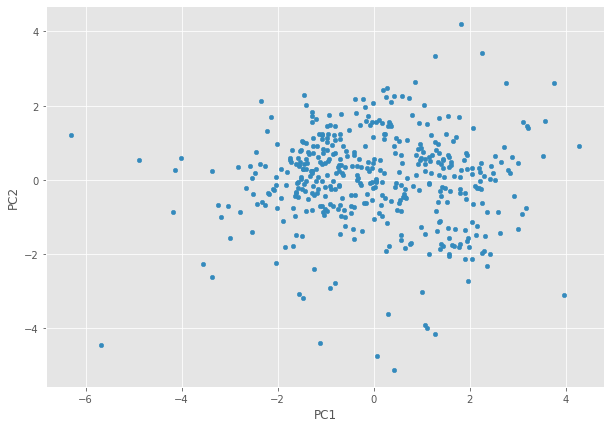

In [69]:
graph = pd.DataFrame(X @ W, columns=['PC1', 'PC2']).plot(kind='scatter', x=0, y=1, figsize=(10,7))

### Quanta informação perdemos nessa decomposição?

A premissa principal do PCA é utilizar os principais componentes que explicam a maior parte da variância contida nos dados originais, ou seja, podemos ler isso como: decompor os dados retendo a maior parte da informação original. Mas como saber quanto exatamente dessa informação conseguimos projetar nos dois componentes principais?

Sabemos que autovetores representam a __direção__, e autovalores representam a __intensidade__ ou magnetude da transformação. Repare que quando aplicamos o SVD manualmente neste notebook usando a função `eig`, tivemos que realinhar os autovetores encontrados de maneira __decrescente__ de acordo com os seus respectivos autovalores antes de aplicar a decomposição, e isso não é por acaso: tanto no SVD quanto no PCA, queremos representar os dados com uma quantidade menor de variáveis novas sem perder tanta informação, e assim, escolhemos os N primeiros componentes principais, que por acaso serão reordenados de acordo com a magnetude deles, que é justamente o que o autovalor representa. A __variância explicada__ dos componentes principais é justamente os __autovalores__ da matriz de covariância.

Ocorre que, a variância explicada por si só não é muito informativa. Por isso é interessante calcular a taxa de variância explicada (__explained variance ratio__), que representa quanto da variância total é explicada por determinado componente principal:

$$ \normalsize \sigma^2_{Total} = \sum_{i=1}^{n}\lambda_i$$

Onde $\sigma^2_{Total}$ representa a variância total, $\lambda_i$ representa um determinado autovalor, e a taxa de variância explicada do componente principal associado a esse autovalor é:

$$ \normalsize \text{ExpVarRatio}_i = \frac{\lambda_i}{\sigma^2_{Total}}$$

Vamos calcular então o quanto da informação foi retida representando os dados originais nos dois componentes principais acima, primeiro calculando a variância total

In [70]:
Var_Total = sum(D)

In [71]:
Var_Total

6.013667425968112

A variância total somando todos os autovalores é de 6. Vamos ver agora a variância explicada pelos 2 componentes principais

In [72]:
print('Variância explicada por PC1: %.2f' % D[0])
print('Variância explicada por PC2: %.2f' % D[1])

Variância explicada por PC1: 2.65
Variância explicada por PC2: 1.63


Já podemos ver por aqui que esses dois componentes principais juntos explicam boa parte da variância original. Calculamos então um vetor contendo a taxa de variância explicada de cada componente principal, simplesmente normalizando o vetor de autovalores pela variância explicada total:

In [73]:
explained_variance_ratio = D / Var_Total

In [74]:
display_vec(explained_variance_ratio)

<br>$\begin{bmatrix}0.44& 0.27& 0.11& 0.10& 0.05& 0.03\end{bmatrix}$<br><br>

Ou seja, o primeiro componente principal (PC1) explica 44% da variância total, enquanto que o segundo componente principal (PC2) explica 27%. Se utilizarmos ambos para representar X, conseguimos portanto reter algo em torno de 71% da informação original, descartando os demais 29% de informação contida. 

Embora a aplicação "tradicional" de PCA seja feita com EVD, muitas das implementações existentes desse algoritmo utilizam diretamente o SVD para fazer essa decomposição. Diferente da aplicação com EVD, não precisamos calcular a matriz de covariância e depois decompó-la, podemos cortar essa etapa com o SVD e decompor diretamente a matriz original. Além de ser mais performático, esse algoritmo é mais __estável numericamente__, o que pode fazer muita diferença dependendo do objetivo da análise.

Porém, para que possamos aplicar o PCA através do SVD, mencionamos acima que é necessário garantir que os dados estejam centralizados e padronizados, para garantir que a relação matemática entre o PCA tradicional e o SVD (que detalhamos abaixo) seja verdadeira. Felizmente, já fizemos isso acima!

### Implementação do PCA utilizando SVD

$X$ é matriz $440$ x $6$ que queremos decompor e projetar em um espaço dimensional reduzido. Como vimos, se fossemos decompor usando o algoritmo tradicional de PCA, precisaríamos computar a matriz de covariância de $X$:

$$\normalsize C = \frac{1}{(n - 1)}X^TX$$

Fazendo a decomposição de $X$ com SVD, geramos as três matrizes resultantes:
<br>
<br>
$$\normalsize X = USV^{T}$$

Sabemos também que a matriz resultante $V$ representa os autovetores de $X^{T}X$, sendo assim:

(1)$$\normalsize X^{T}X = (USV^{T})^{T}(USV^{T})$$

(2)$$\normalsize X^{T}X = VSU^{T}USV^{T}$$

(3)$$\normalsize X^{T}X = VS^{2}V^{T}$$

Portanto, a matriz de covariância de $X$ pode ser representada como:

(1)$$\normalsize C = \frac{1}{(n - 1)}X^TX$$ 

(2)$$\normalsize C = \frac{1}{(n - 1)}VS^{2}V^{T}$$

(3)$$\normalsize C = V\frac{S^{2}}{(n - 1)}V^{T}$$
<br>
<br>
Percebemos assim que os autovetores da direita ($V$) decompostos de $X$ com o SVD representam os mesmos autovetores e autovalores que encontramos fazendo a eigendecomposition da matriz de covariância $C$:

$$\normalsize C = VDV^{-1}$$

Lembrando que $V^{-1} = V^T$

Sendo assim, podemos novamente decompor X com seus componentes principais com a equação:

$$\normalsize X' = XV$$

In [75]:
U,S,V = np.linalg.svd(X)

In [76]:
W = V.T[:,0:2]

In [77]:
display_matrix(W)

<br>$\begin{bmatrix}-0.10&0.59\\0.54&0.13\\0.57&-0.01\\-0.14&0.59\\0.55&-0.07\\0.21&0.53\end{bmatrix}$<br><br>

Dimensões da matriz: (6 x 2)



In [78]:
display_matrix(X @ W, 10)

<br>$\begin{bmatrix}1.38&-0.30\\1.43&0.54\\1.50&1.23\\-0.82&1.21\\0.80&1.76\\0.89&0.13\\0.61&-0.46\\1.15&0.61\\0.53&-0.63\\2.19&0.33\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 2)



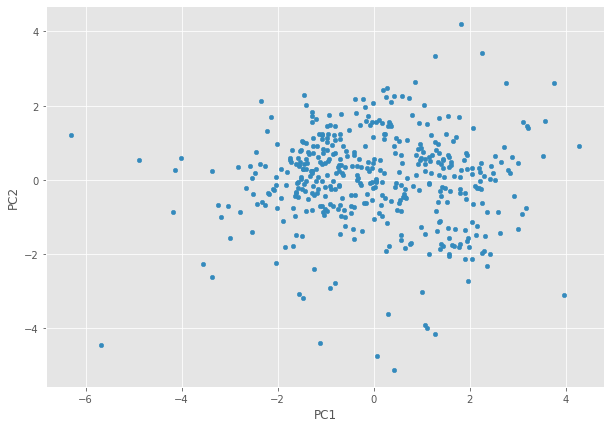

In [79]:
graph = pd.DataFrame(X @ W, columns=['PC1', 'PC2']).plot(kind='scatter', x=0, y=1, figsize=(10,7))

Conseguimos com o SVD chegar nos mesmos resultados encontrados aplicando o PCA tradicional com EVD, porém sem a necessidade de computar uma matrix de covariância. Alternativamente, podemos usar diretamente as matrizes $U$ e $S$ da decomposição com SVD para chegar nos mesmos valores reduzidos: Sendo assim, projetamos $X'_k$:

(1)$$\normalsize X' = XV$$

Substituindo $X$ por $USV^T$:

(2)$$\normalsize X' = USV^{T}V$$

Onde $V^T V = I$ então:

(3)$$\normalsize X' = US$$

Por fim, selecionando apenas os $k$ componentes principais:

(4)$$\normalsize X'_{k} = U_kS_k$$

Transforma o vetor $S$ em uma matriz:

In [80]:
S = np.diag(S)

Novamente trabalharemos com 2 componentes principais, então selecionamos $S_{k}$ de forma a selecionar os $k$ primeiros autovalores na diagonal (repare novamente na imagem na sessão de explicação do SVD)

In [81]:
S_k = S[0:2, 0:2]

In [82]:
display_matrix(S_k)

<br>$\begin{bmatrix}34.08&0\\0&26.76\end{bmatrix}$<br><br>

Dimensões da matriz: (2 x 2)



Seleciona-se as $k$ primeiras colunas da matriz de autovetores esquerdos $U$:

In [83]:
U_k = U[:, 0:2]

In [84]:
display_matrix(U_k, n_rows=5)

<br>$\begin{bmatrix}0.04&-0.01\\0.04&0.02\\0.04&0.05\\-0.02&0.05\\0.02&0.07\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 2)



Aplica a equação mostrada acima:

In [85]:
display_matrix(U_k @ S_k, 10)

<br>$\begin{bmatrix}1.38&-0.30\\1.43&0.54\\1.50&1.23\\-0.82&1.21\\0.80&1.76\\0.89&0.13\\0.61&-0.46\\1.15&0.61\\0.53&-0.63\\2.19&0.33\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 2)



E chegamos novamente aos mesmos resultados, agora usando as matrizes $U$ e $S$.

#### E como fazer para encontrar os autovalores para computar a variância explicada dos componentes principais através do SVD?

Repare novamente na representação da matriz de covariância $C$ sendo decomposta com SVD:

$$\normalsize C = V\frac{S^{2}}{(n - 1)}V^{T}$$

Comparando com a decomposição com __EVD__ ($ C = VDV^{T}$), sabemos que:

$$\normalsize D = \frac{S^{2}}{(n - 1)}$$

Lembrando que os valores singulares de $S$ representam a __raiz__ dos autovalores: $\sigma_i = \sqrt{\lambda_i}$

Finalmente, para encontrar os autovalores:

$$\normalsize \lambda_i = \frac{S_i^{2}}{(n-1)}$$

Abaixo criamos o vetor com autovalores:

In [86]:
autovalores = np.diag((S**2)/(len(X) - 1))

In [87]:
display_vec(autovalores)

<br>$\begin{bmatrix}2.65& 1.63& 0.65& 0.61& 0.30& 0.18\end{bmatrix}$<br><br>

Encontramos novamente os autovalores. Agora, a variância explicada:

In [88]:
Var_Total_svd = sum(autovalores)

In [89]:
Var_Total_svd

6.013667425968112

In [90]:
display_vec(autovalores / Var_Total_svd)

<br>$\begin{bmatrix}0.44& 0.27& 0.11& 0.10& 0.05& 0.03\end{bmatrix}$<br><br>

### Implementação do PCA do pacote Scikit-Learn

Agora chegou a hora de comparar os resultados que chegamnos contra uma implementação de PCA do pacote sklearn, uma das bibliotecas de machine learning mais populares (se não for a mais popular) em python. Primeiro fazemos a importação do algoritmo:

In [91]:
from sklearn.decomposition import PCA

Instancia o algoritmo. Repare que passamos como argumento a quantidade de componentes principais com que queremos trabalhar

In [92]:
pca_sklearn = PCA(n_components=2)

Basta aplica o método `fit_transform` do algoritmo passando os dados originais para fazer a decomposição (em outras palavras, todo o processo que fizemos manualmente neste notebook, porém da maneira mais performática possível)

In [93]:
X_reduzido_sklearn = pca_sklearn.fit_transform(X)

Podemos ver abaixo que o algoritmo do sklearn chegou a mesma decomposição, porém com sinais invertidos

In [94]:
display_matrix(X_reduzido_sklearn, 10)

<br>$\begin{bmatrix}-1.38&0.30\\-1.43&-0.54\\-1.50&-1.23\\0.82&-1.21\\-0.80&-1.76\\-0.89&-0.13\\-0.61&0.46\\-1.15&-0.61\\-0.53&0.63\\-2.19&-0.33\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 2)



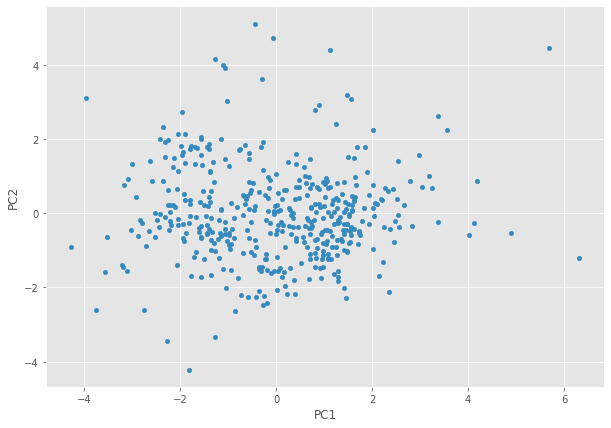

In [95]:
graph = pd.DataFrame(X_reduzido_sklearn, columns=['PC1', 'PC2']).plot(kind='scatter', x=0, y=1, figsize=(10,7))

Podemos acessar os atributos do algoritmo para verificar os autovetores, autovalores, variância explicada, encontrados durante a decomposição. Em teoria, devem ser os mesmos valores que encontramos manualmente (mas que podem estar com sinal invertido como vimos). 

Vamos conferir primeiro os componentes principais usando o atributo `components_`. Repare aqui que como definimos a quantidade de componentes principais antes de aplicar o algoritmo, temos apenas os valores relacionados aos $n$ componentes definidos (no caso 2)

In [96]:
display_matrix(pca_sklearn.components_.T)

<br>$\begin{bmatrix}0.10&-0.59\\-0.54&-0.13\\-0.57&0.01\\0.14&-0.59\\-0.55&0.07\\-0.21&-0.53\end{bmatrix}$<br><br>

Dimensões da matriz: (6 x 2)



Os autovetores são os mesmos, porém com sinal invertido, vamos ver os autovalores agora. Como essa implementação aplica o PCA com o SVD, o atributo que temos a disposição neste caso são os $k$ maiores valores singulares de $X$, que devem ser próximos a 34.08 e 26.76:

In [97]:
display_vec(pca_sklearn.singular_values_)

<br>$\begin{bmatrix}34.08& 26.76\end{bmatrix}$<br><br>

Aplica a fórmula para encontrar os autovalores:

In [98]:
display_vec((pca_sklearn.singular_values_**2)/(len(X) - 1))

<br>$\begin{bmatrix}2.65& 1.63\end{bmatrix}$<br><br>

Por fim, podemos usar o atributo `explained_variance_ratio` para ver a taxa de variância explicada. Os dois componentes principais, como foram os mesmos encontrados, devem ter uma taxa de aproximadamente 44% e 27% de variância explicada respectivamente:

In [99]:
display_vec(pca_sklearn.explained_variance_ratio_)

<br>$\begin{bmatrix}0.44& 0.27\end{bmatrix}$<br><br>

## Correção do sinal dos autovetores

Como foi mencionado mais acima no notebook, a natureza ambígua de autovetores faz com que algoritmos diferentes computem os vetores com sinais diferentes, o que como dissemos, não afeta em si a decomposição, mas pode gerar decomposições com sinais invertidos entre diferentes algoritmos já que cada um lida com essa ambiguidade de maneira diferente, e foi exatamente isso o que ocorreu acima quando comparamos a implementação manual com EVD, com SVD e a partir da implementação pronta de PCA do pacote `sklearn`. A implementação de PCA do pacote `sklearn` no caso utiliza uma função chamada `svd_flip` para determinar o sinal dos vetores de acordo com os maiores valores dos vetores, de forma que os maiores valores absolutos serão sempre __positivos__:
<br>
<br>
<br>

                    def svd_flip(u, v, u_based_decision=True):
                    
                        """Sign correction to ensure deterministic output from SVD.
                        Adjusts the columns of u and the rows of v such that the loadings in the
                        columns in u that are largest in absolute value are always positive.
                        Parameters
                        ----------
                        u, v : ndarray
                            u and v are the output of `linalg.svd` or
                            `sklearn.utils.extmath.randomized_svd`, with matching inner dimensions
                            so one can compute `np.dot(u * s, v)`.
                        u_based_decision : boolean, (default=True)
                            If True, use the columns of u as the basis for sign flipping.
                            Otherwise, use the rows of v. The choice of which variable to base the
                            decision on is generally algorithm dependent.
                        Returns
                        -------
                        u_adjusted, v_adjusted : arrays with the same dimensions as the input.
                        """
                        
                        if u_based_decision:
                            # columns of u, rows of v
                            max_abs_cols = np.argmax(np.abs(u), axis=0)
                            signs = np.sign(u[max_abs_cols, xrange(u.shape[1])])
                            u *= signs
                            v *= signs[:, np.newaxis]
                        else:
                            # rows of v, columns of u
                            max_abs_rows = np.argmax(np.abs(v), axis=1)
                            signs = np.sign(v[xrange(v.shape[0]), max_abs_rows])
                            u *= signs
                            v *= signs[:, np.newaxis]
                        return u, v
<br>
<br>
<br>

Se tiver interesse, pode ver essa função no próprio <a href='https://github.com/scikit-learn/scikit-learn/blob/4c65d8e615c9331d37cbb6225c5b67c445a5c959/sklearn/utils/extmath.py#L609'>repositório</a> github do pacote sklearn. 

Continuando, aqui estamos reproduzindo o PCA agora com o SVD, que é exatamente como a própria implementação de PCA do `sklearn` funciona. Abaixo, simulamos o ajuste de sinal realizado pela função acima na matriz `U`, que está sendo usada para decompor X. 

Primeiro, mapeia o maior valor de cada vetor de `U`:

In [100]:
max_abs_cols = np.argmax(np.abs(U), axis=0)

Após isso, mapeia qual o sinal de cada um destes valores (o que retornará um vetor de 1 / -1)

In [101]:
signs = np.sign(U[max_abs_cols, range(U.shape[1])])

Multiplica U por esse vetor

In [102]:
U_ajustado = U * signs

Matriz original

In [103]:
display_matrix(U, n_rows=5, n_cols=2)

<br>$\begin{bmatrix}0.04&-0.01\\0.04&0.02\\0.04&0.05\\-0.02&0.05\\0.02&0.07\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 440)



Após aplicar o "svd_flip" improvisado que fizemos:

In [104]:
display_matrix(U_ajustado, n_rows=5, n_cols=2)

<br>$\begin{bmatrix}-0.04&0.01\\-0.04&-0.02\\-0.04&-0.05\\0.02&-0.05\\-0.02&-0.07\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 440)



Feito o ajuste de sinal, o resto do procedimento é exatamente o mesmo:

In [105]:
U_k_ajustado = U_ajustado[:, 0:2]

In [106]:
X_reduzido_svd_flip = U_k_ajustado @ S_k

Abaixo vemos então que agora foi possível reproduzir exatamente a implementação de PCA do sklearn. Decompõe a matriz original usando SVD, faz a inversão de sinais, e aplica os autovetores aos autovalores para decompor X

In [107]:
display_matrix(X_reduzido_svd_flip, 10)

<br>$\begin{bmatrix}-1.38&0.30\\-1.43&-0.54\\-1.50&-1.23\\0.82&-1.21\\-0.80&-1.76\\-0.89&-0.13\\-0.61&0.46\\-1.15&-0.61\\-0.53&0.63\\-2.19&-0.33\end{bmatrix}$<br><br>

Dimensões da matriz: (440 x 2)



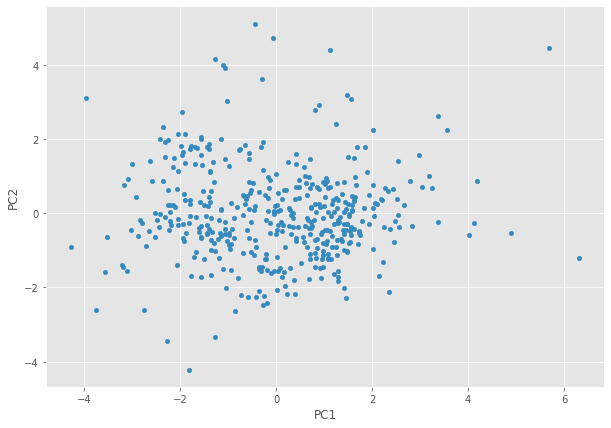

In [108]:
graph = pd.DataFrame(X_reduzido_svd_flip, columns=['PC1', 'PC2']).plot(kind='scatter', x=0, y=1, figsize=(10,7))